In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
import os 
os.getcwd()

'c:\\Users\\yoe_1\\OneDrive\\Escritorio\\CARPETA DOCUMENTOS\\PRACTICANDO CON PYTHON'

*   Obejtivo principal : En base a las ventas realizadas los años anteriores. Calcular la cantidad maxima de zapatillas que se debe producir este año, dónde se debe producir y cómo.

In [3]:
#Carga de datos
df = pd.read_csv("C:/Users/yoe_1/OneDrive/Escritorio/CARPETA DOCUMENTOS/PRACTICANDO CON PYTHON/shoes_dataset.csv")
df

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,12/31/2016,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,$139.00,0%,$139.00
14963,65774,12/31/2016,United States,2181,US12,Female,12.0,42-43,10.0,$149.00,0%,$149.00
14964,65775,12/31/2016,Canada,2203,CAN6,Male,10.5,43-44,10.0,$179.00,30%,$125.30
14965,65776,12/31/2016,Germany,2231,GER1,Female,9.5,40,7.5,$199.00,0%,$199.00


## Data Cleaning

In [4]:
# Se establece  formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Se crean columnas para Año-Mes-Dia
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [5]:
# Se retira signo de dolar de las siguientes variables
df['SalePrice'] = df['SalePrice'].apply(lambda x: float(x[2:]))
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: float(x[2:]))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  float64       
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  float64       
 12  Year           14967 non-null  int64         
 13  Month          14967 non-null  int64         
 14  Day            14967 non-null  int64         
dtypes: datetime64[ns](1

In [7]:
describe = df.describe()
describe

,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,SalePrice,Year,Month,Day
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,9.195630,8.089497,164.171377,143.987913,2015.308211,6.689517,15.745306
std,3889.598714,27.633526,1.511719,1.970014,22.940544,35.180799,0.762320,3.319909,8.719764
min,52389.000000,2147.000000,4.500000,2.500000,129.000000,64.500000,2014.000000,1.000000,1.000000
25%,55648.500000,2172.000000,8.000000,6.500000,149.000000,125.100000,2015.000000,4.000000,8.000000
50%,59092.000000,2195.000000,9.000000,8.500000,159.000000,149.000000,2015.000000,7.000000,16.000000
75%,62433.000000,2219.000000,10.000000,9.500000,179.000000,169.000000,2016.000000,10.000000,23.000000
max,65777.000000,2242.000000,15.000000,14.500000,199.000000,199.000000,2016.000000,12.000000,31.000000


## Data Analysis

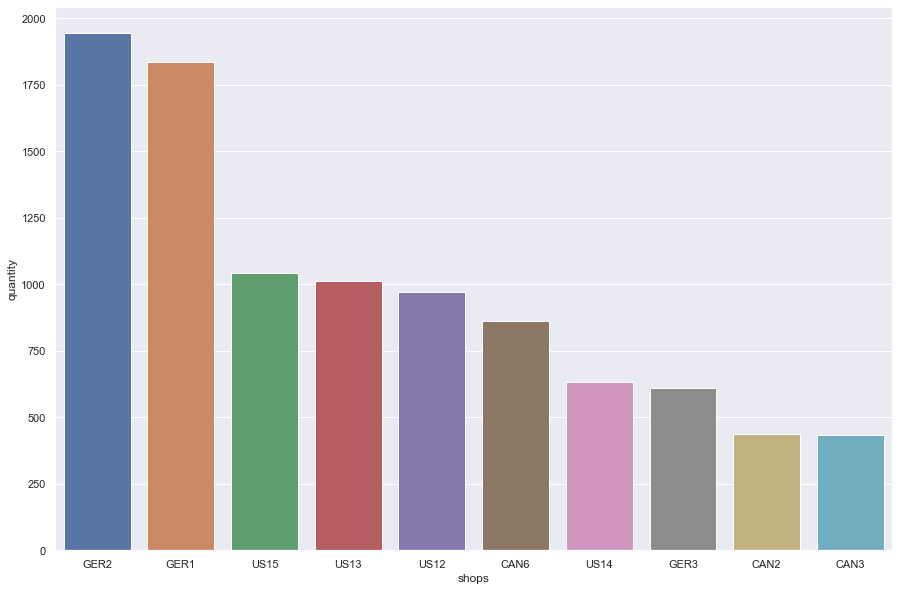

In [55]:
# Top 10 locales con mayor cantidad de ventas registradas 
frequency_shops = df['Shop'].value_counts().head(10)
df_frequency_shops = pd.DataFrame({'shops': frequency_shops.index.tolist(), 'quantity': frequency_shops.tolist()})
sns.barplot(x='shops', y='quantity', data=df_frequency_shops)
plt.show()


In [9]:
# Se define  las  variables categoricas y numericas
categorical_variables = ['Country', 'ProductID', 'Shop', 'Gender', 'Size (US)', 'Discount', 'Year', 'Month']
numerical_variables = ['UnitPrice', 'SalePrice']


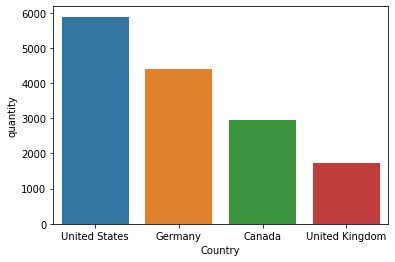

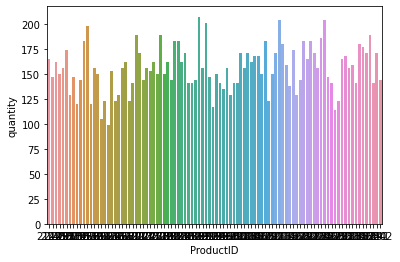

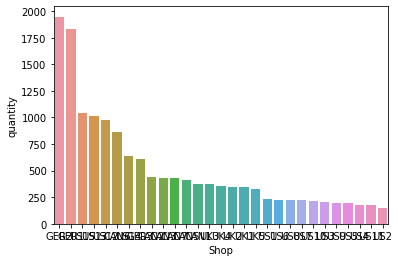

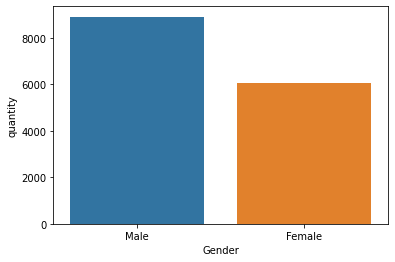

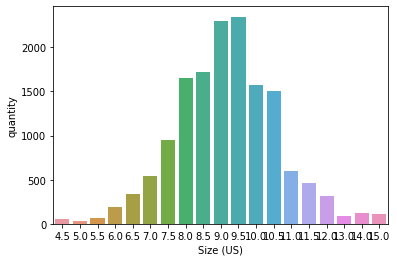

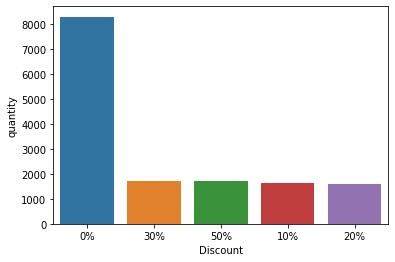

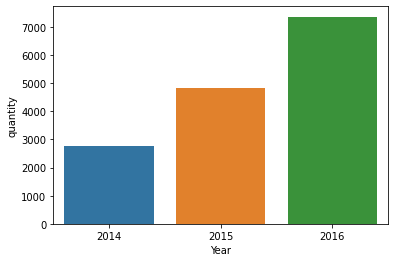

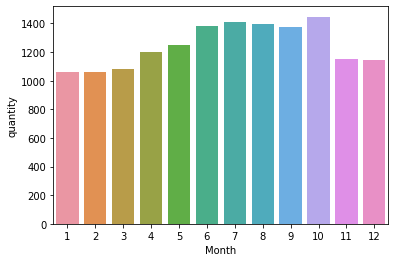

In [10]:
# Un recorrido en las variables categoricas para visualizar sus frecuencias
for cat_variable in categorical_variables:
    frequency = df[cat_variable].value_counts()
    df_frequency = pd.DataFrame({cat_variable: frequency.index.tolist(), 'quantity': frequency.tolist()})
    sns.barplot(x=cat_variable, y='quantity', data=df_frequency)
    plt.show()

**Algunas observaciones a simple vista:**
> Estados Unidos es el pais donde se observa mayores ventas

> Existe un mayor volumen de zapatillas de varones vendidas

> Mayores ventas en el periodo de abril a octubre


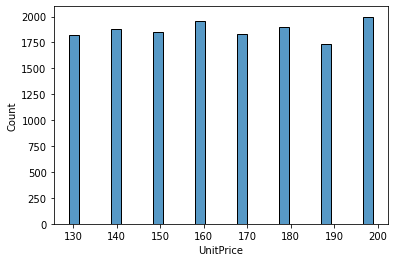

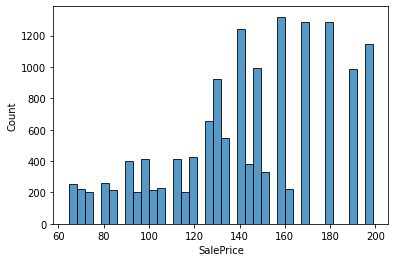

In [13]:
# Un recorrido en las  variables numericas 
for num_variable in numerical_variables:
    sns.histplot(df[num_variable], bins='auto')
    plt.show()

In [14]:
df.corr()

,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,SalePrice,Year,Month,Day
InvoiceNo,1.000000,0.003446,-0.011095,-0.005791,-0.019302,-0.016736,0.909878,0.352655,0.033078
ProductID,0.003446,1.000000,-0.030131,-0.029968,0.029623,0.012046,0.008498,-0.010678,0.007704
Size (US),-0.011095,-0.030131,1.000000,0.944293,-0.020793,-0.001599,-0.016028,0.002577,0.009361
Size (UK),-0.005791,-0.029968,0.944293,1.000000,-0.019445,-0.003161,-0.010760,0.005981,0.011108
UnitPrice,-0.019302,0.029623,-0.020793,-0.019445,1.000000,0.605639,-0.021188,0.008345,0.007574
SalePrice,-0.016736,0.012046,-0.001599,-0.003161,0.605639,1.000000,-0.016176,-0.000989,-0.002425
Year,0.909878,0.008498,-0.016028,-0.010760,-0.021188,-0.016176,1.000000,-0.015438,0.002261
Month,0.352655,-0.010678,0.002577,0.005981,0.008345,-0.000989,-0.015438,1.000000,0.004216
Day,0.033078,0.007704,0.009361,0.011108,0.007574,-0.002425,0.002261,0.004216,1.000000


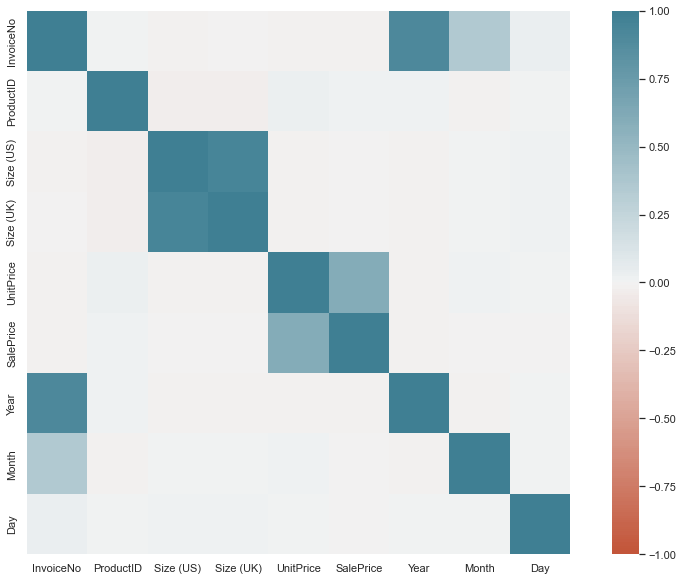

In [58]:
# Se analizan las correlaciones entre las variables de la data

corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True)
plt.show()


No existe alguna correlacion relevante para el presente analisis entre las variables de nuestros datos

***Escenario 1:*** Se agrupan las ventas de zapatillas de varones para EE.UU en los años 2015-2016

<AxesSubplot:xlabel='Gender'>

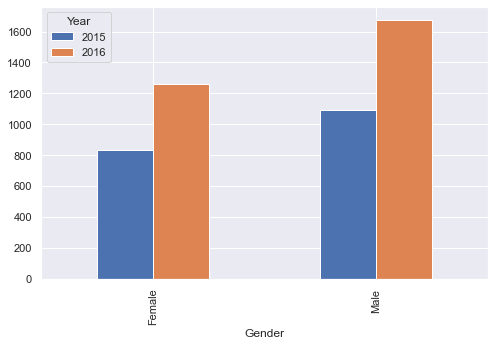

In [205]:
# Hay mayor presencia de venta de zapatillas de varones dentro del mercado estadounidense

us= df[(df['Year'] != 2014) & (df['Country'] == 'United States')]\
    .groupby(['Year','Gender']).size().unstack(level=0).fillna(value=0)
us.plot(kind='bar',stacked=False)

In [81]:
# Agruparemos basándonos en la talla 'Size (US)', en base al año y al mes. Con la función size() 
# realizaremos el conteo de nuestros datos para obtener la cantidad de tallas vendidas, con la función 
# unstack(level=0) podremos utilizar Size (US) como nuestras columnas y con fillna(value=0) el cual llenara los valores Nan con el valor 0

grouped= df[(df['Year'] != 2014) & (df['Gender'] == 'Male') & (df['Country'] == 'United States')]\
    .groupby(['Size (US)', 'Year', 'Month']).size().unstack(level=0).fillna(value=0)


<AxesSubplot:xlabel='Size (US)', ylabel='Year-Month'>

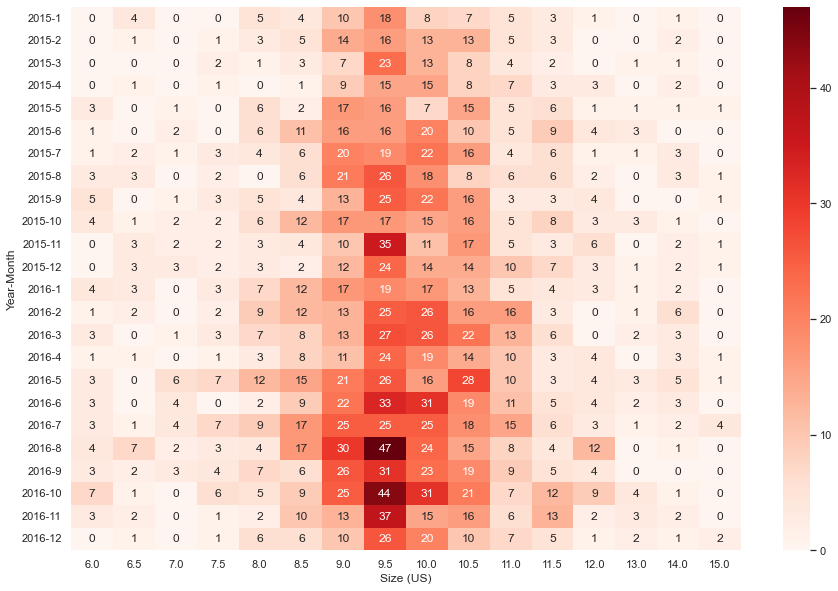

In [82]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(grouped, annot=True,cmap="Reds")

In [71]:
# Se calcula la media y el error standar de la tabla anterior para determinar el intervalo de confianza que permitira 
# conocer los valores mínimos y máximos basados en nuestros datos.
means = []
standard_errors = []

for column in grouped.columns:
    means.append(grouped[column].mean())
    standard_errors.append(grouped[column].sem())


In [72]:
# La media y error standar segun la talla de zapatillas de la muestra
d = {'means': means, 'std_error': standard_errors}
df_calculations = pd.DataFrame(data=d, index=grouped.columns)

In [204]:
# Calculo del margen de Error (T-score X Error standar)
## T-Score = 2.07 (al nivel de confianza 95%, donde n-1=23)

df_calculations['error_margin'] = df_calculations['std_error'].apply(lambda x: x * 2.07)

In [74]:
# Calculo del intervalo de confianza ( Se suma y resta la media al margen de error)

df_calculations['low_margin'] = df_calculations.apply(lambda x: x['means'] - x['error_margin'], axis=1)
df_calculations['up_margin'] = df_calculations.apply(lambda x: x['means'] + x['error_margin'], axis=1)

# Se redondea al alza para determinar la cantidad máxima de zapatillas con un nivel de confianza al 95% basados en los años 2015 y 2016.
df_calculations['math_round_up'] = df_calculations.apply(lambda x: math.ceil(x['up_margin']), axis=1)
df_calculations

,means,std_error,error_margin,low_margin,up_margin,math_round_up
Size (US),,,,,,
6.0,2.166667,0.393179,0.813880,1.352787,2.980546,3
6.5,1.583333,0.340059,0.703922,0.879411,2.287255,3
7.0,1.333333,0.338725,0.701160,0.632174,2.034493,3
7.5,2.333333,0.411196,0.851176,1.482158,3.184509,4
8.0,4.791667,0.598849,1.239618,3.552049,6.031284,7
8.5,7.875000,0.944689,1.955505,5.919495,9.830505,10
9.0,16.333333,1.262139,2.612628,13.720705,18.945961,19
9.5,25.583333,1.766144,3.655917,21.927416,29.239251,30
10.0,18.791667,1.325583,2.743957,16.047709,21.535624,22


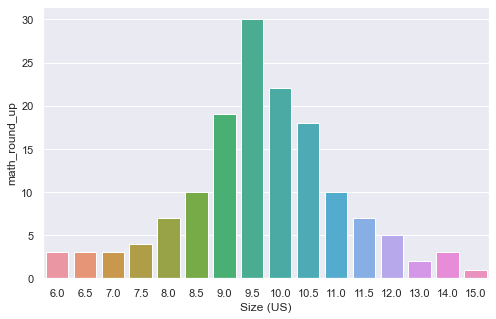

In [75]:
# Grafica 
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x=df_calculations.index, y='math_round_up', data=df_calculations)
plt.show()

> Conclusion 1:  

En este escenario se contempla que,según el historico de los 2 ultimos años, el mayor numero de ventas viene dado por las zapatillas de varones dentro del mercado Estadounidense por lo cual se empleo calculos estadisticos para determinar el intervalo de confianza y asi definir cuales serian las cantidades minimas y maximas a producir el presente año.

***Escenario 2:*** Se agrupan las ventas de zapatillas de varones para EE.UU en los años 3 ultimos años.

<AxesSubplot:xlabel='Gender'>

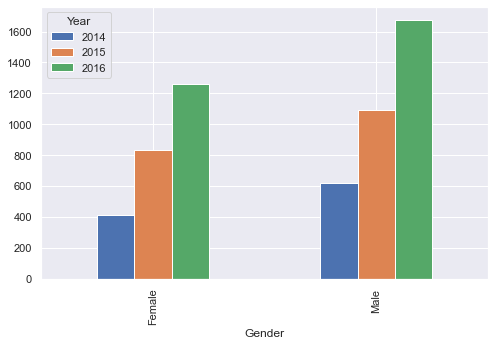

In [206]:
# Hay mayor presencia de venta de zapatillas de varones dentro del mercado estadounidense

us= df[df['Country'] == 'United States']\
    .groupby(['Year','Gender']).size().unstack(level=0).fillna(value=0)
us.plot(kind='bar',stacked=False)


<AxesSubplot:xlabel='Size (US)', ylabel='Year-Month'>

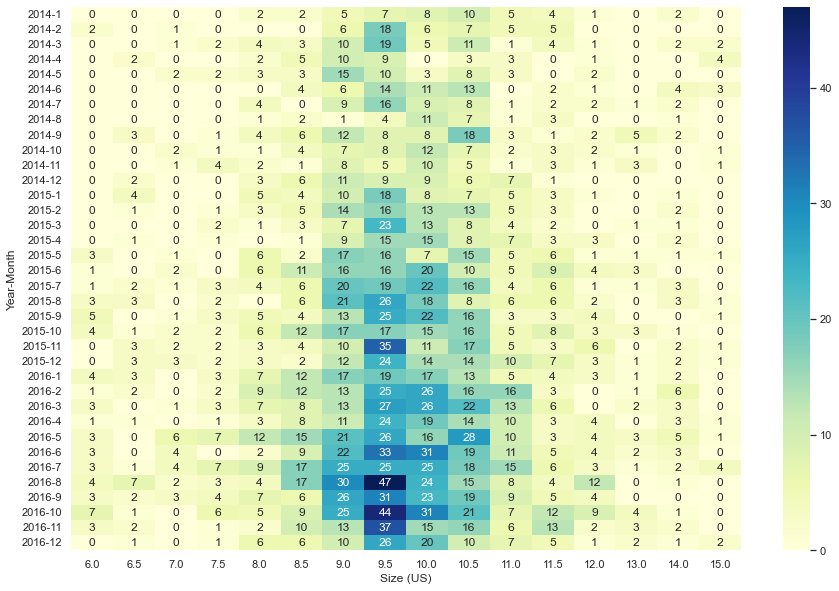

In [201]:
grouped = df[(df['Gender'] == 'Male') & (df['Country'] == 'United States')]\
    .groupby(['Size (US)', 'Year', 'Month']).size().unstack(level=0).fillna(value=0)
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(grouped, annot=True,cmap="YlGnBu")

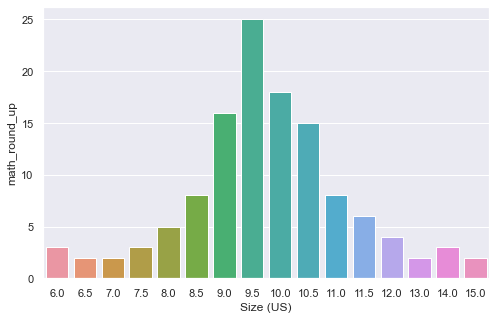

In [203]:
means = []
standard_errors = []

for column in grouped.columns:
    means.append(grouped[column].mean())
    standard_errors.append(grouped[column].sem())


# La media y error standar segun la talla de zapatillas de la muestra
d = {'means': means, 'std_error': standard_errors}
df_calculations = pd.DataFrame(data=d, index=grouped.columns)
df_calculations


# Calculo del margen de Error (T-score X Error standar)
## T-Score = 2.0301 (al nivel de confianza 95%, donde n-1=35)

df_calculations['error_margin'] = df_calculations['std_error'].apply(lambda x: x * 2.0301)
df_calculations

# Calculo del intervalo de confianza ( Se suma y resta la media al margen de error)

df_calculations['low_margin'] = df_calculations.apply(lambda x: x['means'] - x['error_margin'], axis=1)
df_calculations['up_margin'] = df_calculations.apply(lambda x: x['means'] + x['error_margin'], axis=1)

# Se redondea al alza para determinar la cantidad máxima de zapatillas con un nivel de confianza al 95% basados en los años 2015 y 2016.
df_calculations['math_round_up'] = df_calculations.apply(lambda x: math.ceil(x['up_margin']), axis=1)
df_calculations

# Grafica 
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x=df_calculations.index, y='math_round_up', data=df_calculations)
plt.show()

> Conclusion 2:  

En este escenario se considera el historico de los 3 ultimos años y todavia el mayor numero de ventas viene dado por las zapatillas de varones en el mercado Estadounidense, empleando los mismos calculos estadisticos solo el intervalo de confianza presento una reduccion y eso es debido al incremento de la muestra.En tal sentido, la conclusión no es muy diferencte a la primera.

***Escenario 3:*** Se agrupan las ventas de zapatillas según el genero para EE.UU en los años 2015-2016

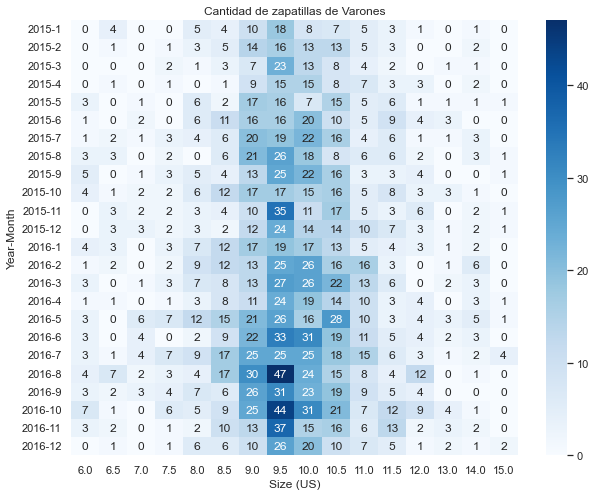

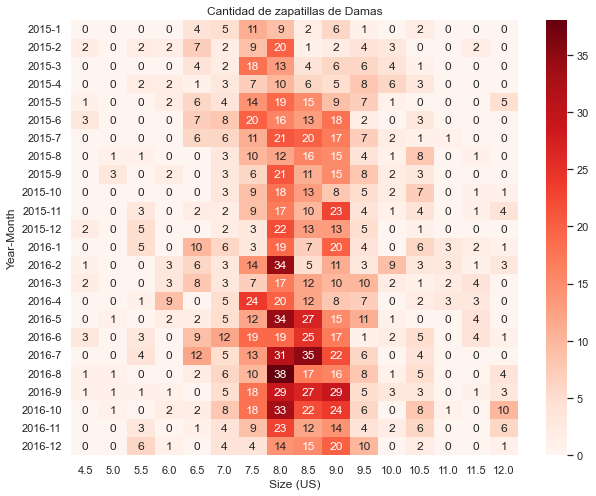

In [130]:
grouped_f= df[(df['Year'] != 2014) & (df['Gender']=='Female') & (df['Country'] == 'United States')]\
    .groupby(['Size (US)','Year', 'Month']).size().unstack(level=0).fillna(value=0)

grouped_m= df[(df['Year'] != 2014) & (df['Gender']=='Male') & (df['Country'] == 'United States')]\
    .groupby(['Size (US)','Year', 'Month']).size().unstack(level=0).fillna(value=0)

#Graficos

graficos=[grouped_m,grouped_f]
Colores= ['Blues','Reds']
Genero=['Varones','Damas']

for i in range(0,2):
    sns.set(rc = {'figure.figsize':(10,8)})
    sns.heatmap(graficos[i], annot=True,cmap=Colores[i]).set_title('Cantidad de zapatillas de '+ str(Genero[i]))
    plt.show()

In [114]:
means_m = []
means_f = []
standard_errors_m = []
standard_errors_f = []


for column in grouped_m.columns:
    means_m.append(grouped_m[column].mean())
    standard_errors_m.append(grouped_m[column].sem())

for column in grouped_f.columns:
    means_f.append(grouped_f[column].mean())
    standard_errors_f.append(grouped_f[column].sem())


-- For men --

In [122]:
# La media y error standar segun la talla de zapatillas de la muestra
d_m = {'means': means_m, 'std_error': standard_errors_m}
df_calculations_m = pd.DataFrame(data=d_m, index=grouped_m.columns)

# Calculo del margen de Error (T-score X Error standar)
## T-Score = 2.07 (al nivel de confianza 95%, donde n-1=23)

df_calculations_m['error_margin'] = df_calculations_m['std_error'].apply(lambda x: x * 2.07)

# Calculo del intervalo de confianza ( Se suma y resta la media al margen de error)

df_calculations_m['low_margin'] = df_calculations_m.apply(lambda x: x['means'] - x['error_margin'], axis=1)
df_calculations_m['up_margin'] = df_calculations_m.apply(lambda x: x['means'] + x['error_margin'], axis=1)

# Se redondea al alza para determinar la cantidad máxima de zapatillas con un nivel de confianza al 95% basados en los años 2015 y 2016.
df_calculations_m['math_round_up'] = df_calculations_m.apply(lambda x: math.ceil(x['up_margin']), axis=1)


-- For Women --

In [123]:
# La media y error standar segun la talla de zapatillas de la muestra
d_f = {'means': means_f, 'std_error': standard_errors_f}
df_calculations_f = pd.DataFrame(data=d_f, index=grouped_f.columns)

# Calculo del margen de Error (T-score X Error standar)
## T-Score = 2.07 (al nivel de confianza 95%, donde n-1=23)

df_calculations_f['error_margin'] = df_calculations_f['std_error'].apply(lambda x: x * 2.07)

# Calculo del intervalo de confianza ( Se suma y resta la media al margen de error)

df_calculations_f['low_margin'] = df_calculations_f.apply(lambda x: x['means'] - x['error_margin'], axis=1)
df_calculations_f['up_margin'] = df_calculations_f.apply(lambda x: x['means'] + x['error_margin'], axis=1)

# Se redondea al alza para determinar la cantidad máxima de zapatillas con un nivel de confianza al 95% basados en los años 2015 y 2016.
df_calculations_f['math_round_up'] = df_calculations_f.apply(lambda x: math.ceil(x['up_margin']), axis=1)

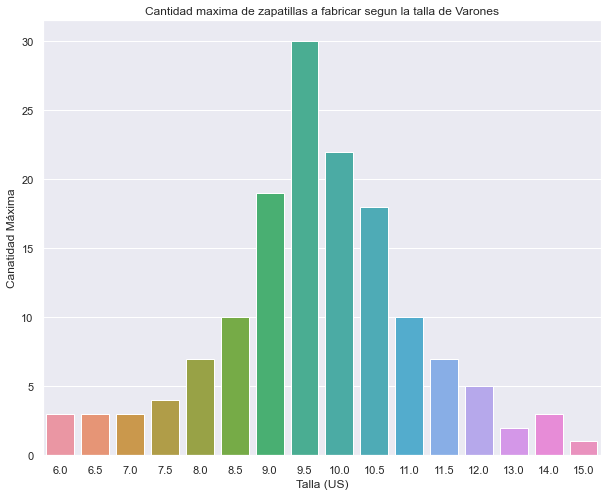

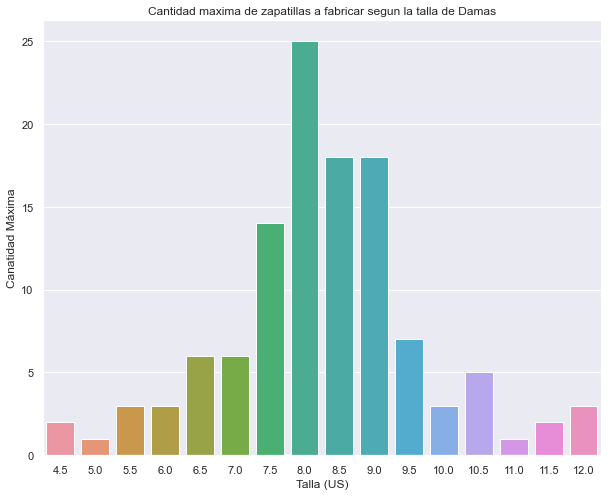

In [133]:
# Grafica 
from turtle import title


calculations=[df_calculations_m,df_calculations_f]
Genero=['Varones','Damas']

for i in range(0,2):
    sns.set(rc = {'figure.figsize':(10,8)})
    sns.barplot(x=calculations[i].index, y='math_round_up', data=calculations[i])\
                .set(title= 'Cantidad maxima de zapatillas a fabricar segun la talla de '+str(Genero[i]),\
                     xlabel = "Talla (US)", ylabel = "Canatidad Máxima" )
    plt.show()

> Conclusion 3:  

En este escenario se emplearon las mismas tecnicas estadisticas, con la leve diferencia que se toma al genero en un grupo aparte con la finalidad de hacer un analisis mas limpio al momento de determinar las cantidades minimas y maximas a fabricar en el mercado estadounidense(Periodo 2015-2016). Esto debido a que las zapatillas atienden a 2 publicos objetivo diferentes.


## Conclusión: 

Se deberia producir en el mercado Estadounidense ya que a nivel de pais es donde mayores ventas se han registrado.En relacion a la cantidad maxima a producir, esta viene dada en funcion a la talla. Asi mismo,  ya que la naturaleza del producto apunta a 2 publicos objetivos, se debe producir la cantidad maxima tomando en cuenta el genero.